# EXAMPLE 002

Cessna 172, ISA1976 integrated with Flat Earth (Euler angles).

Example with trimmed aircraft: stationary descent, symmetric, wings level
flight.

The main purpose of this example is to check if the aircraft trimmed 
in a given state maintains the trimmed flight condition.

In [1]:
# -*- coding: utf-8 -*-

Import python libreries needed.

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

Import PyFME classes

In [3]:
from pyfme.aircrafts import Cessna172
from pyfme.environment.environment import Environment
from pyfme.environment.atmosphere import ISA1976
from pyfme.environment.gravity import VerticalConstant
from pyfme.environment.wind import NoWind
from pyfme.models.systems import EulerFlatEarth
from pyfme.simulator import BatchSimulation
from pyfme.utils.trimmer import steady_state_flight_trimmer

Initialize variables

In [4]:
aircraft = Cessna172()
atmosphere = ISA1976()
gravity = VerticalConstant()
wind = NoWind()
environment = Environment(atmosphere, gravity, wind)

Initial conditions

In [5]:
TAS = 45  # m/s
h0 = 2000  # m
psi0 = 1.0  # rad
x0, y0 = 0, 0  # m
turn_rate = 0.0  # rad/s
gamma0 = -0.1  # rad

Define system

In [6]:
system = EulerFlatEarth(lat=0, lon=0, h=h0, psi=psi0, x_earth=x0, y_earth=y0)

not_trimmed_controls = {'delta_elevator': 0.05,
                        'delta_aileron': 0.01 * np.sign(turn_rate),
                        'delta_rudder': 0.01 * np.sign(turn_rate),
                        'delta_t': 0.5}

controls2trim = ['delta_elevator', 'delta_aileron', 'delta_rudder', 'delta_t']

In [7]:
trimmed_ac, trimmed_sys, trimmed_env, results = steady_state_flight_trimmer(
    aircraft, system, environment, TAS=TAS, controls_0=not_trimmed_controls,
    controls2trim=controls2trim, gamma=gamma0, turn_rate=turn_rate, verbose=1)

`xtol` termination condition is satisfied.
Function evaluations: 43, initial cost: 2.5520e+01, final cost 9.5390e-03, first-order optimality 8.22e-02.


c:\python35-32\lib\site-packages\pyfme\utils\trimmer.py:138: RuntimeWarning: Trim process did not converge
  warn("Trim process did not converge", RuntimeWarning)


Steady state flight trimmer results

In [8]:
print('delta_elevator = ',"%8.4f" % np.rad2deg(results['delta_elevator']), 'deg')
print('delta_aileron = ', "%8.4f" % np.rad2deg(results['delta_aileron']), 'deg')
print('delta_rudder = ', "%8.4f" % np.rad2deg(results['delta_rudder']), 'deg')
print('delta_t = ', "%8.4f" % results['delta_t'], '%')
print()
print('alpha = ', "%8.4f" % np.rad2deg(results['alpha']), 'deg')
print('beta = ', "%8.4f" % np.rad2deg(results['beta']), 'deg')
print()
print('u = ', "%8.4f" % results['u'], 'm/s')
print('v = ', "%8.4f" % results['v'], 'm/s')
print('w = ', "%8.4f" % results['w'], 'm/s')
print()
print('psi = ', "%8.4f" % np.rad2deg(psi0), 'deg')
print('theta = ', "%8.4f" % np.rad2deg(results['theta']), 'deg')
print('phi = ', "%8.4f" % np.rad2deg(results['phi']), 'deg')
print()
print('p =', "%8.4f" % results['p'], 'rad/s')
print('q =', "%8.4f" % results['q'], 'rad/s')
print('r =', "%8.4f" % results['r'], 'rad/s')

delta_elevator =   -3.3500 deg
delta_aileron =   -0.0000 deg
delta_rudder =    0.0003 deg
delta_t =    0.2932 %

alpha =    4.9512 deg
beta =   -0.0004 deg

u =   44.8321 m/s
v =   -0.0003 m/s
w =    3.8839 m/s

psi =   57.2958 deg
theta =   -0.7783 deg
phi =    0.0000 deg

p =   0.0000 rad/s
q =   0.0000 rad/s
r =   0.0000 rad/s


Initialise simulation

In [9]:
my_simulation = BatchSimulation(trimmed_ac, trimmed_sys, trimmed_env)

In [10]:
tfin = 150  # seconds
N = tfin * 100 + 1
time = np.linspace(0, tfin, N)
initial_controls = trimmed_ac.controls

In [11]:
controls = {}
for control_name, control_value in initial_controls.items():
    controls[control_name] = np.ones_like(time) * control_value

my_simulation.set_controls(time, controls)

In [12]:
par_list = ['x_earth', 'y_earth', 'height',
            'psi', 'theta', 'phi',
            'u', 'v', 'w',
            'v_north', 'v_east', 'v_down',
            'p', 'q', 'r',
            'alpha', 'beta', 'TAS',
            'F_xb', 'F_yb', 'F_zb',
            'M_xb', 'M_yb', 'M_zb']

Run Simulation

In [13]:
my_simulation.set_par_dict(par_list)
my_simulation.run_simulation()

Plot results

In [14]:
plt.style.use('ggplot')

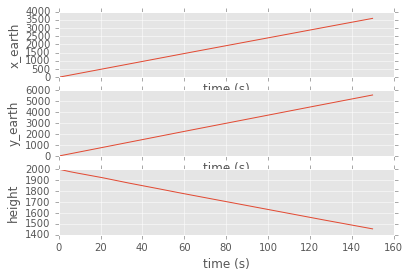

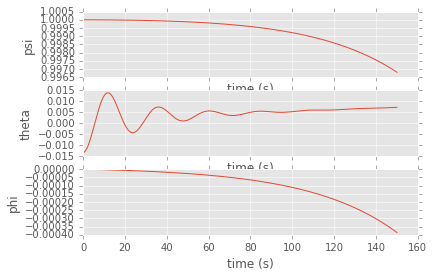

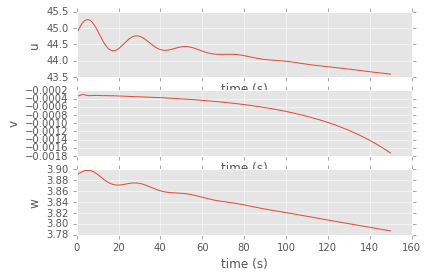

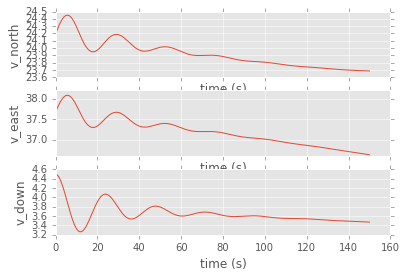

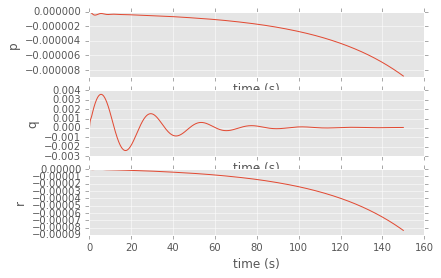

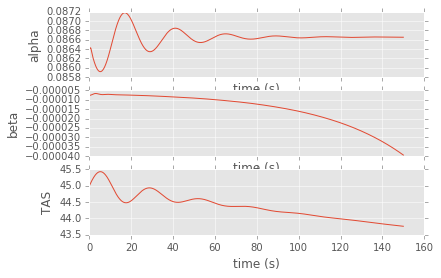

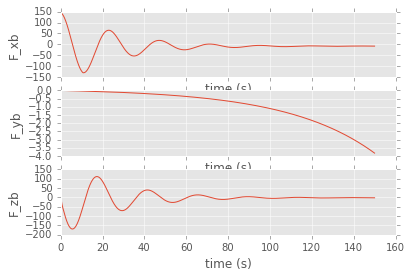

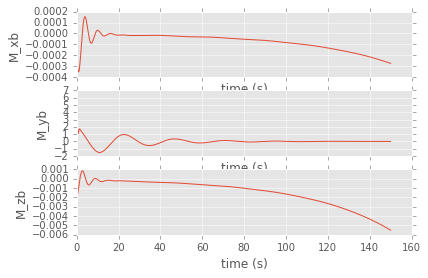

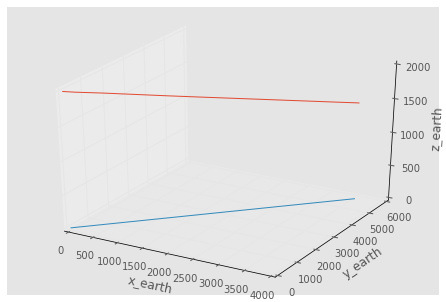

In [15]:
for ii in range(len(par_list) // 3):
    three_params = par_list[3 * ii:3 * ii + 3]
    fig, ax = plt.subplots(3, 1, sharex=True)
    for jj, par in enumerate(three_params):
        ax[jj].plot(time, my_simulation.par_dict[par])
        ax[jj].set_ylabel(par)
        ax[jj].set_xlabel('time (s)')

fig = plt.figure()
ax = Axes3D(fig)
ax.plot(my_simulation.par_dict['x_earth'],
        my_simulation.par_dict['y_earth'],
        my_simulation.par_dict['height'])

ax.plot(my_simulation.par_dict['x_earth'],
        my_simulation.par_dict['y_earth'],
        my_simulation.par_dict['height'] * 0)
ax.set_xlabel('x_earth')
ax.set_ylabel('y_earth')
ax.set_zlabel('z_earth')

plt.show()